In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Importing dataset
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

In [ ]:
# loading the dataset to pandas data frame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


In [ ]:
# print first 5 coloums of dataset
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# adding the target price to the dataframe
house_price_dataframe['price']=house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [ ]:
# checking for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

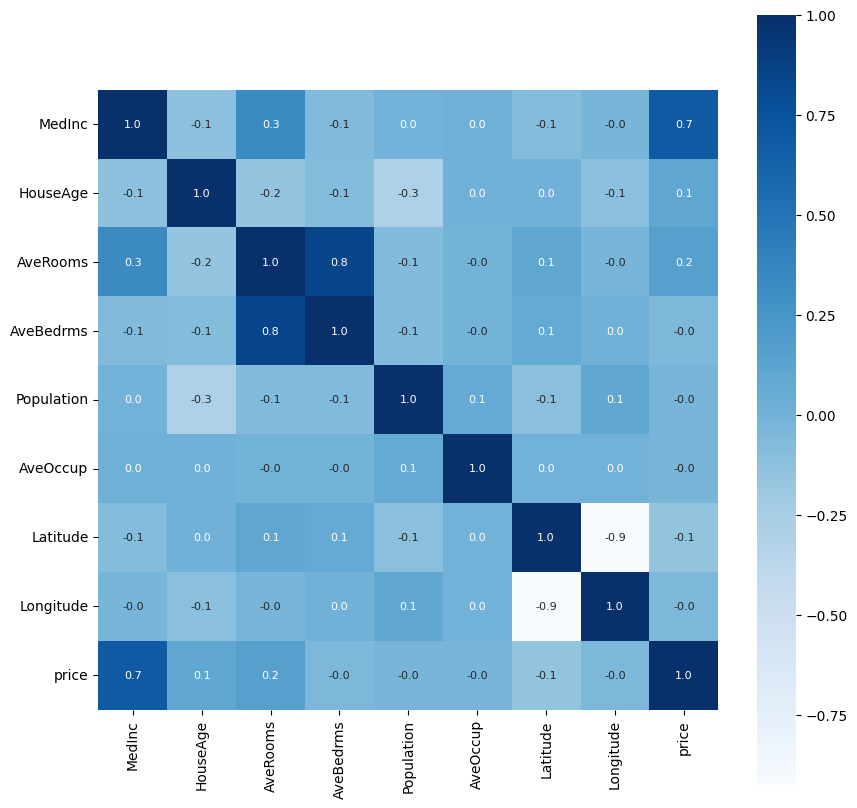

In [ ]:
# constructing heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# splitting the data and target
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
# Model training with XGBoost Regressor model
# loading the model
model = XGBRegressor()
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction On Training Data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
print(X_train)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
2072   1.4817       6.0  4.443645   1.134293      1397.0  3.350120     36.77    -119.84
10600  6.9133       8.0  5.976471   1.026471       862.0  2.535294     33.68    -117.80
2494   1.5536      25.0  4.088785   1.000000       931.0  4.350467     36.60    -120.19
4284   1.5284      31.0  2.740088   1.008811       597.0  2.629956     34.10    -118.32
16541  4.0815      21.0  5.166667   1.002688      1130.0  3.037634     37.79    -121.23
...       ...       ...       ...        ...         ...       ...       ...        ...
1099   3.0625      20.0  5.860000   1.112000       745.0  2.980000     39.59    -121.90
18898  2.6133      49.0  5.163755   1.100437      1131.0  2.469432     38.11    -122.25
11798  4.4958      19.0  5.899767   1.074592      1206.0  2.811189     38.92    -121.22
6637   2.5750      39.0  3.591203   1.086675      2546.0  3.293661     34.16    -118.14
2575   2.2478      31.0  5.12381

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
# Printing both errors
print(" R squared error : ", score_1)
print(" mean absolute error : ", score_2)

 R squared error :  0.943650140819218
 mean absolute error :  0.1933648700612105


Visualising the actual Prices and predicted prices

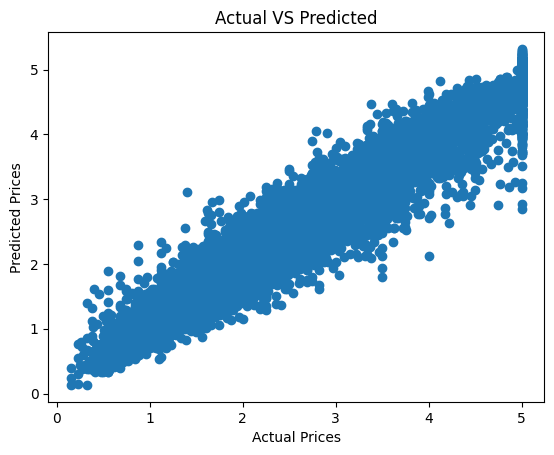

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual VS Predicted")
plt.show()

Prediction On Test Data


In [ ]:
test_data_prediction = model.predict(X_test)
print(X_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
10385  6.4114      15.0  7.527559   1.049869      2529.0  3.318898     33.60    -117.65
1943   4.1843      12.0  6.330084   1.041783      2033.0  2.831476     38.62    -120.91
7490   1.7411      35.0  5.369159   1.294393       909.0  4.247664     33.93    -118.23
16889  3.4412      39.0  4.173405   1.074573      2156.0  1.937107     37.59    -122.37
11416  7.8195      16.0  8.602349   1.058725      2142.0  3.593960     33.70    -117.98
...       ...       ...       ...        ...         ...       ...       ...        ...
13767  4.8173      25.0  6.160494   1.081481      1071.0  2.644444     34.04    -117.12
20606  2.0800      30.0  5.140316   1.055336      1702.0  3.363636     39.12    -121.57
7340   2.1743      30.0  3.364395   0.994437      3208.0  4.461752     33.97    -118.16
14312  1.6023      32.0  3.878788   1.069697      1335.0  4.045455     32.70    -117.14
20262  4.2227      28.0  4.89953

In [ ]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)
# mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)
# Printing both errors
print(" R squared error : ", score_3)
print(" mean absolute error : ", score_4)

 R squared error :  0.8338000331788725
 mean absolute error :  0.3108631800268186
